In [1]:
import numpy as np
import pickle
import includes.isde as isde
from includes.qualitative import *

np.random.seed(0)

In [2]:
#Levine13
X_levine13 = np.load("data/Levine13/X.npy")
indices_train_levine13 = np.load("data/Levine13/indices_train.npy")
indices_validation_levine13 = np.load("data/Levine13/indices_validation.npy")
X_train_levine13 = X_levine13[indices_train_levine13, :]
X_validation_levine13 = X_levine13[indices_validation_levine13, :]
by_subsets_levine13 = pickle.load(open("data/Levine13/by_subets", "rb"))
best_partition_levine13 = isde.find_optimal_partition(scores_by_subsets=by_subsets_levine13, max_size=5,
                                                min_size=1, sense='maximize')[0]

#Levine32
X_levine32 = np.load("data/Levine32/X.npy")
indices_train_levine32 = np.load("data/Levine32/indices_train.npy")
indices_validation_levine32 = np.load("data/Levine32/indices_validation.npy")
X_train_levine32 = X_levine32[indices_train_levine32, :]
X_validation_levine32 = X_levine32[indices_validation_levine32, :]
by_subsets_levine32 = pickle.load(open("data/Levine32/by_subets", "rb"))
best_partition_levine32 = isde.find_optimal_partition(scores_by_subsets=by_subsets_levine32, max_size=3,
                                                min_size=1, sense='maximize')[0]

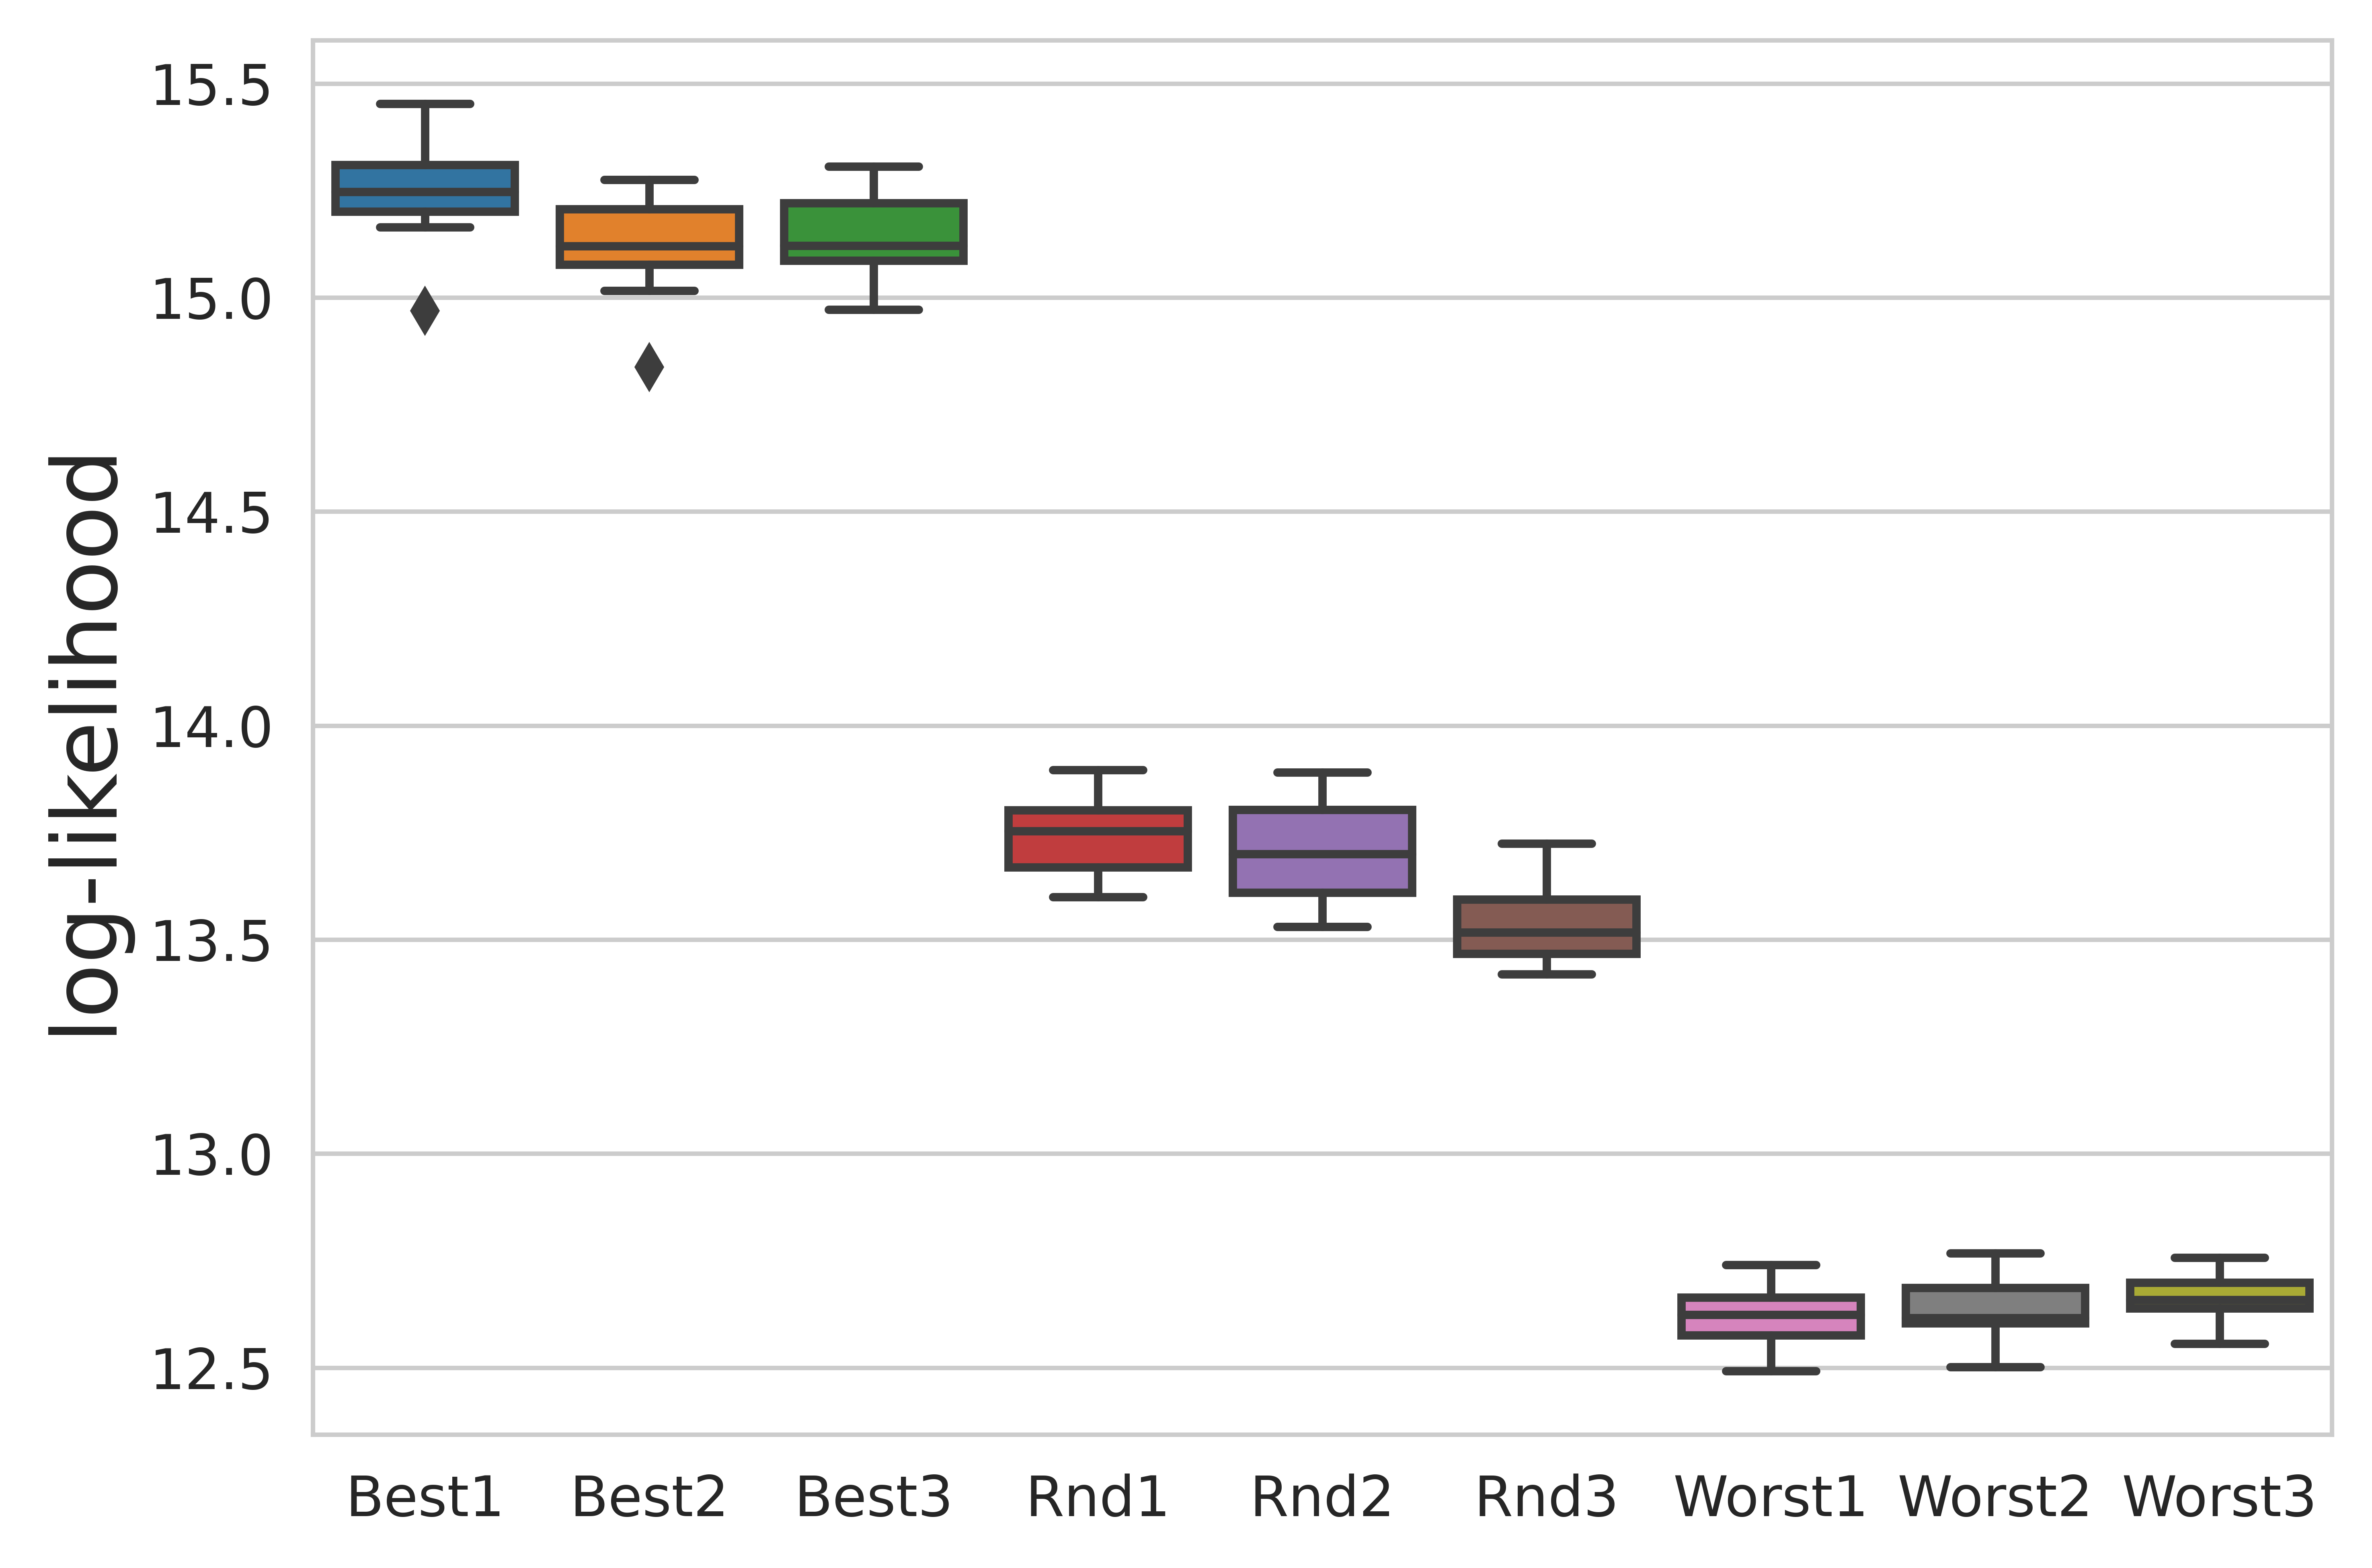

<Figure size 6000x4000 with 0 Axes>

In [3]:
best_worst_rnd(X_train=X_train_levine13, X_validation=X_validation_levine13,
               by_subsets=by_subsets_levine13, k=5, exp_name="Levine13")

/home/louis/These/repos/ISDE-Paper/includes/isde.py:171: RuntimeWarning: divide by zero encountered in log
  return np.log( gaussian_kde(grid_points=grid_points, eval_points=eval_points, h=self.bandwidth) )


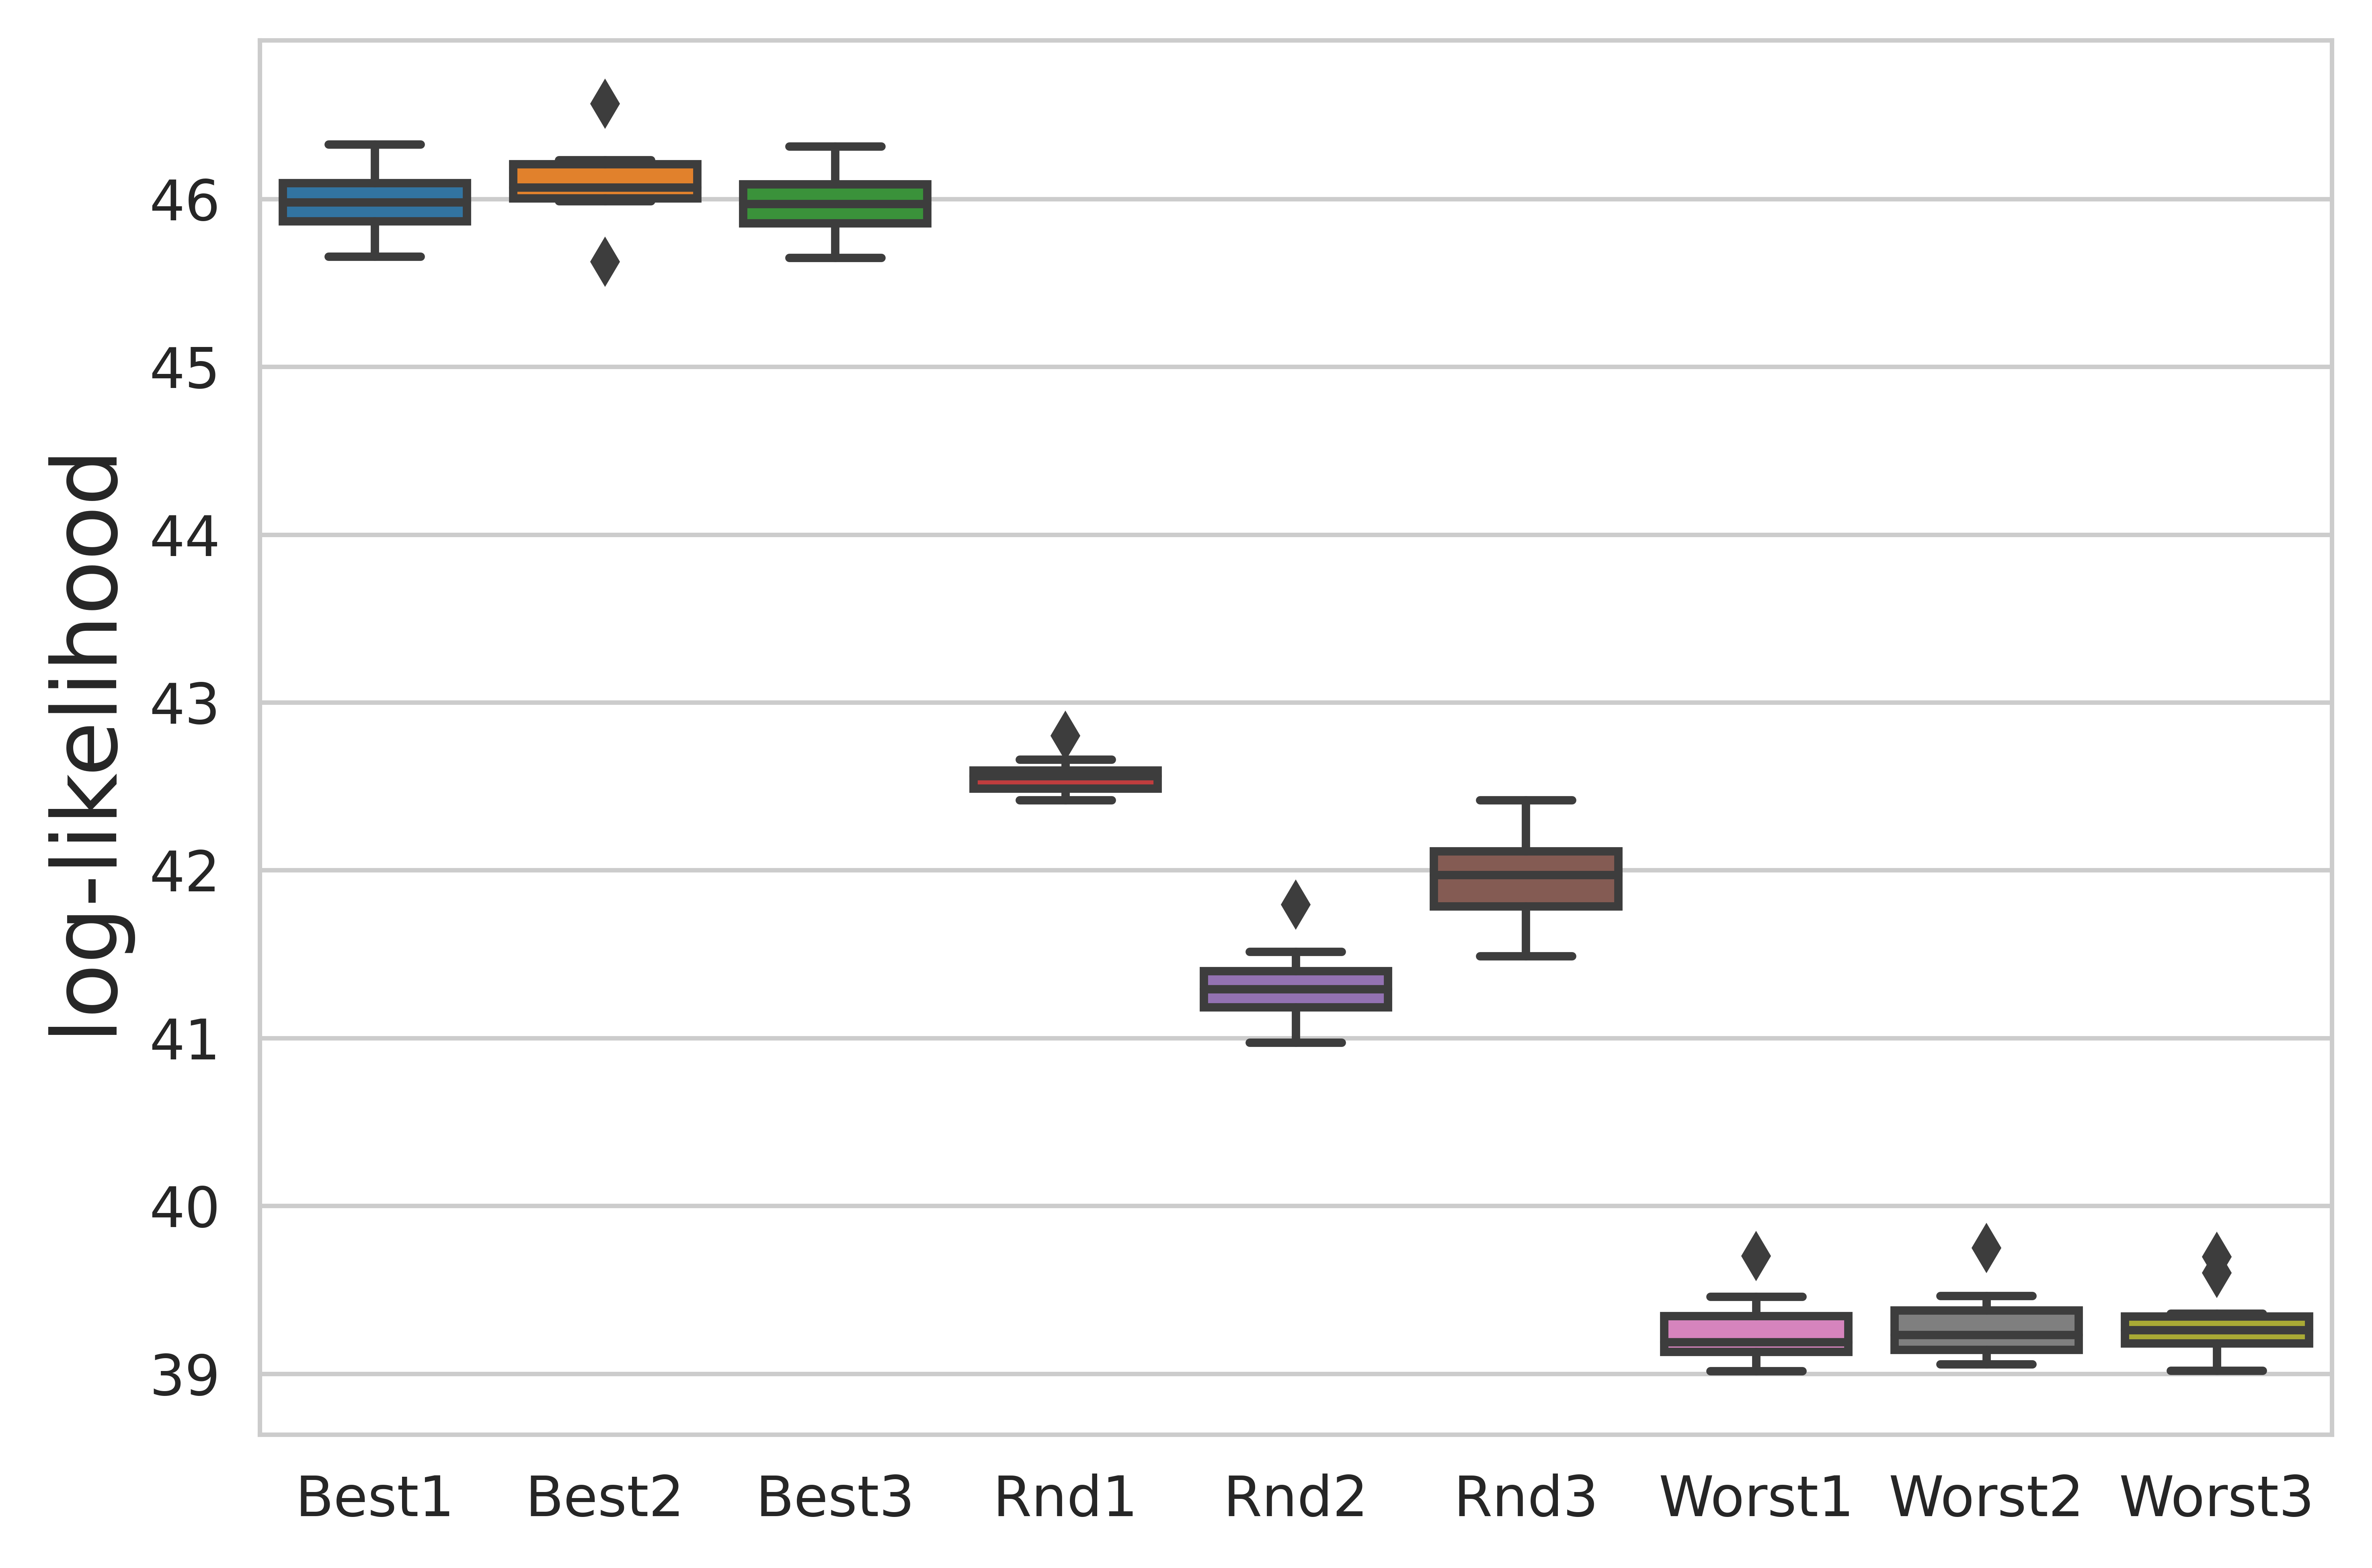

<Figure size 6000x4000 with 0 Axes>

In [4]:
best_worst_rnd(X_train=X_train_levine32, X_validation=X_validation_levine32,
               by_subsets=by_subsets_levine32, k=3, exp_name="Levine32")

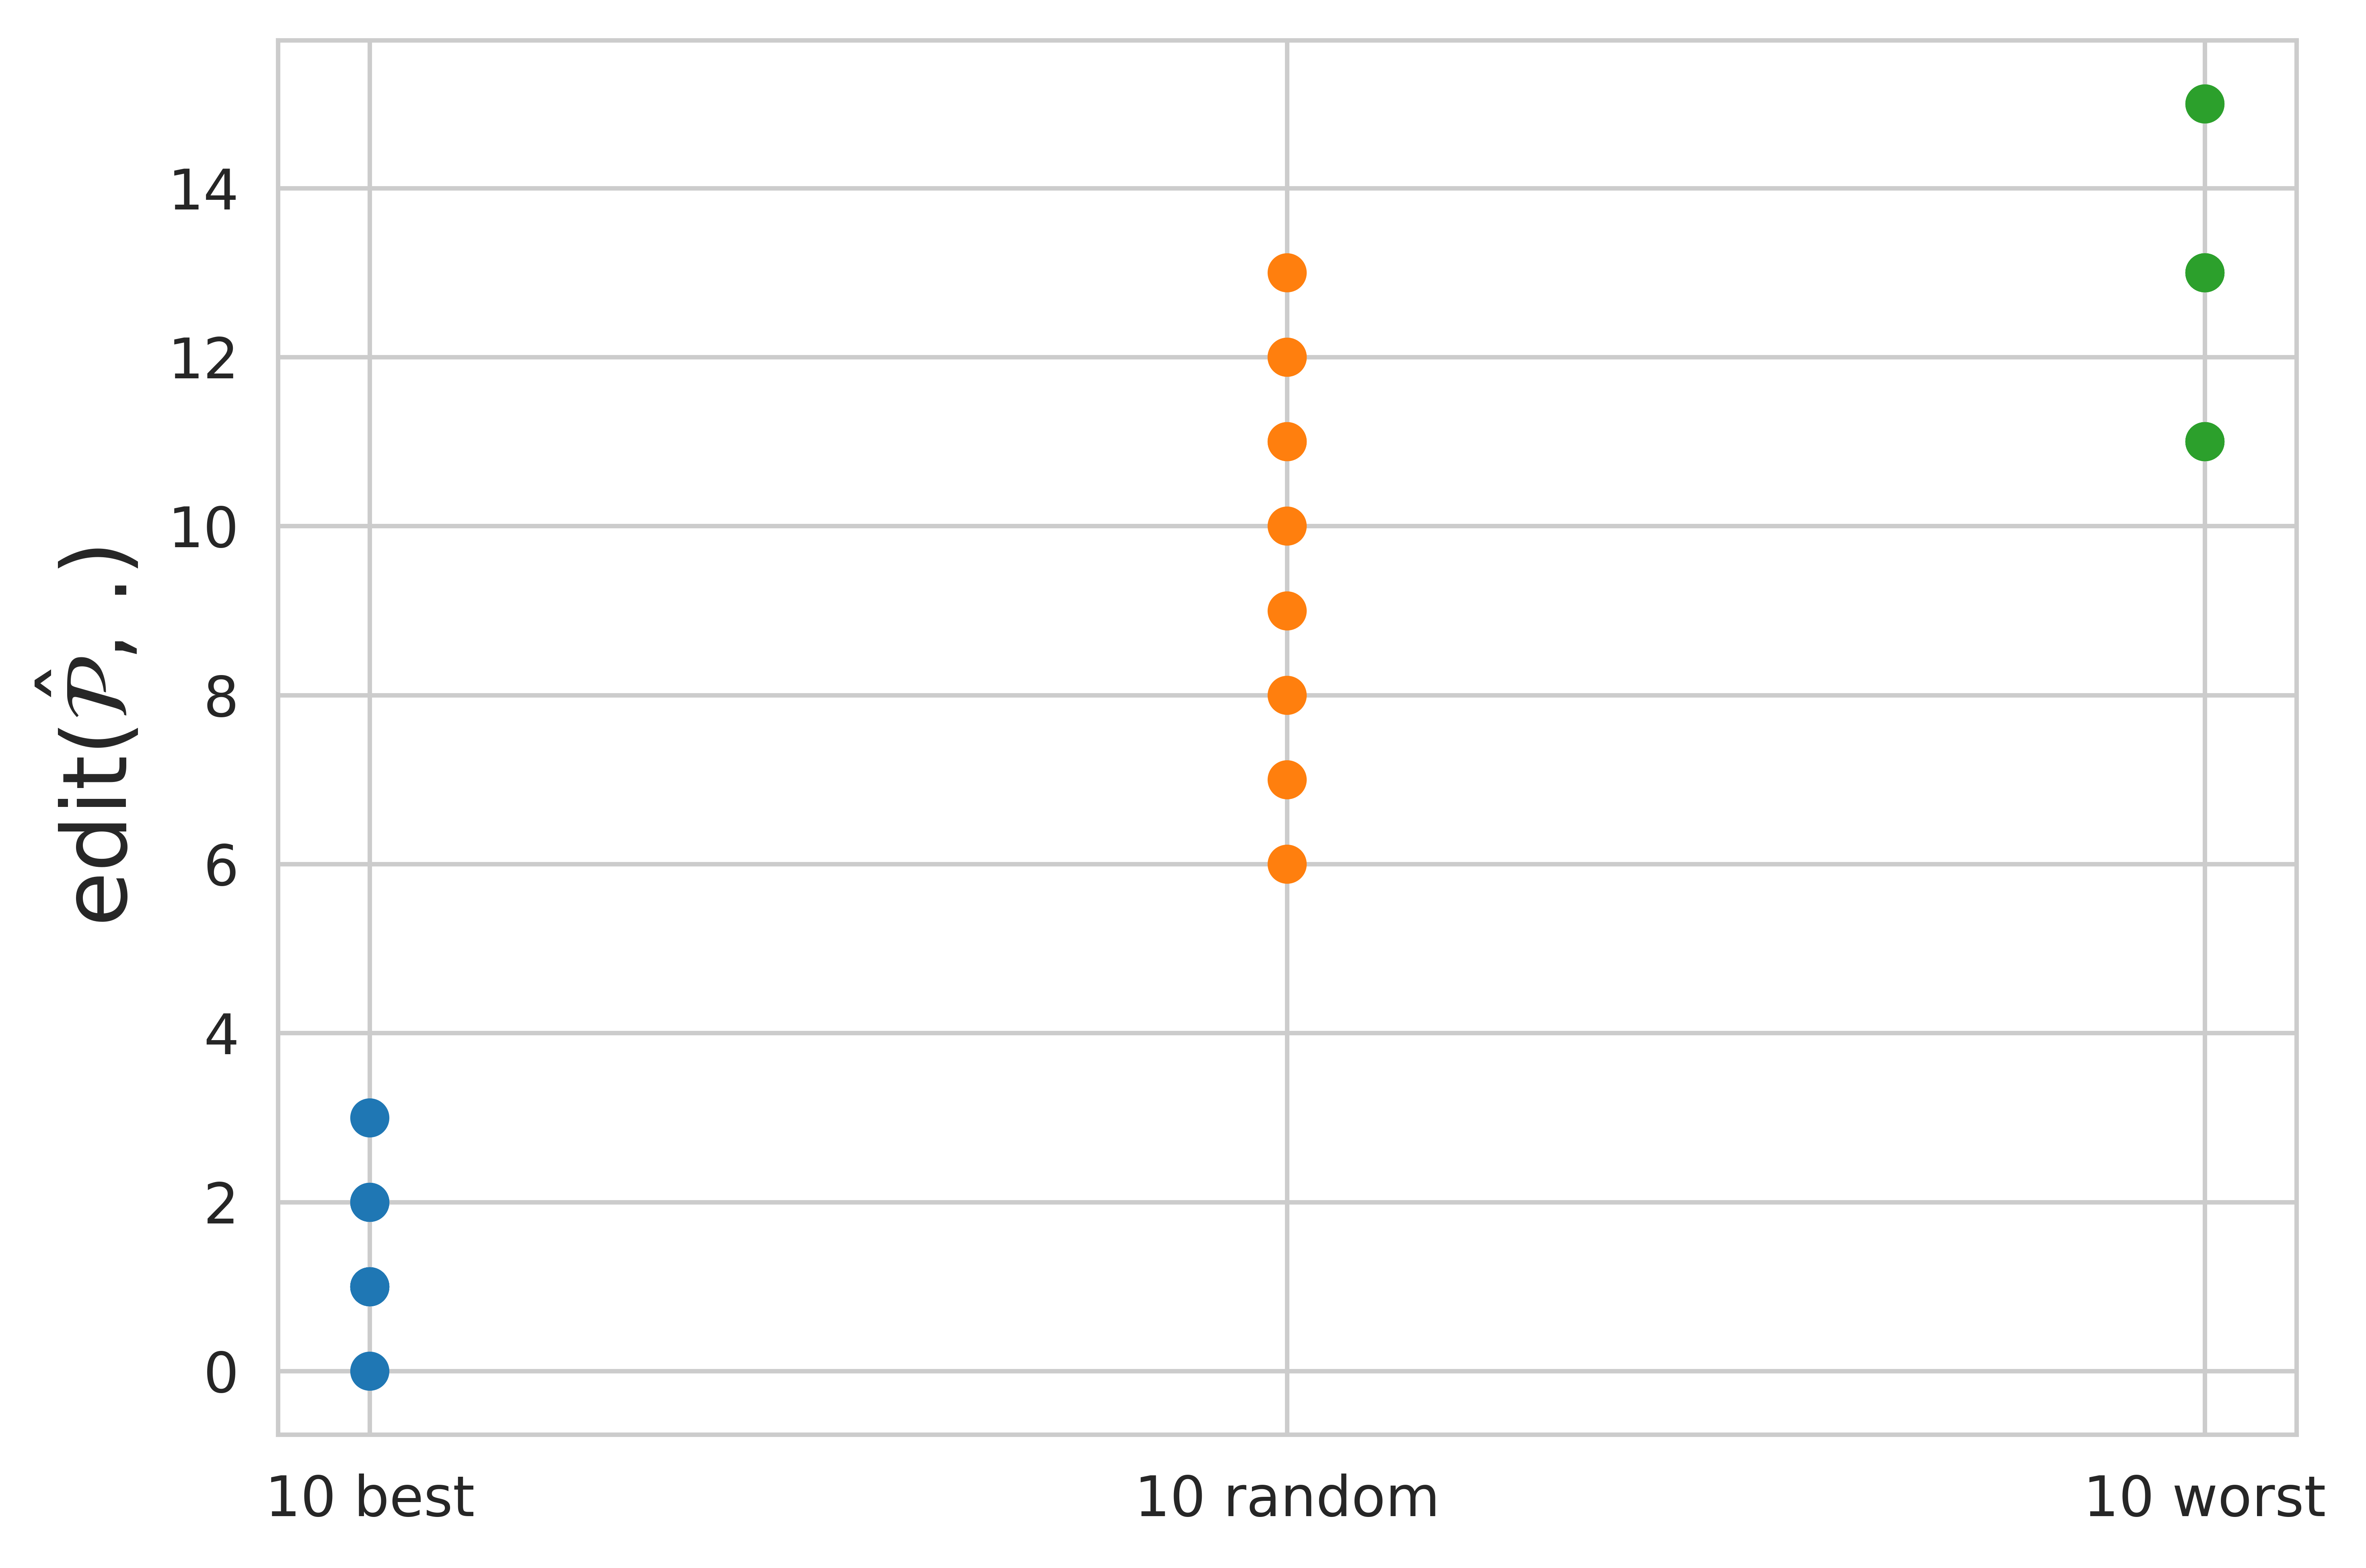

<Figure size 6000x4000 with 0 Axes>

In [5]:
edit_distance_best_rnd_worst(best_partition=best_partition_levine13, by_subsets=by_subsets_levine13,
                             d=13, k=5, exp_name="Levine13")

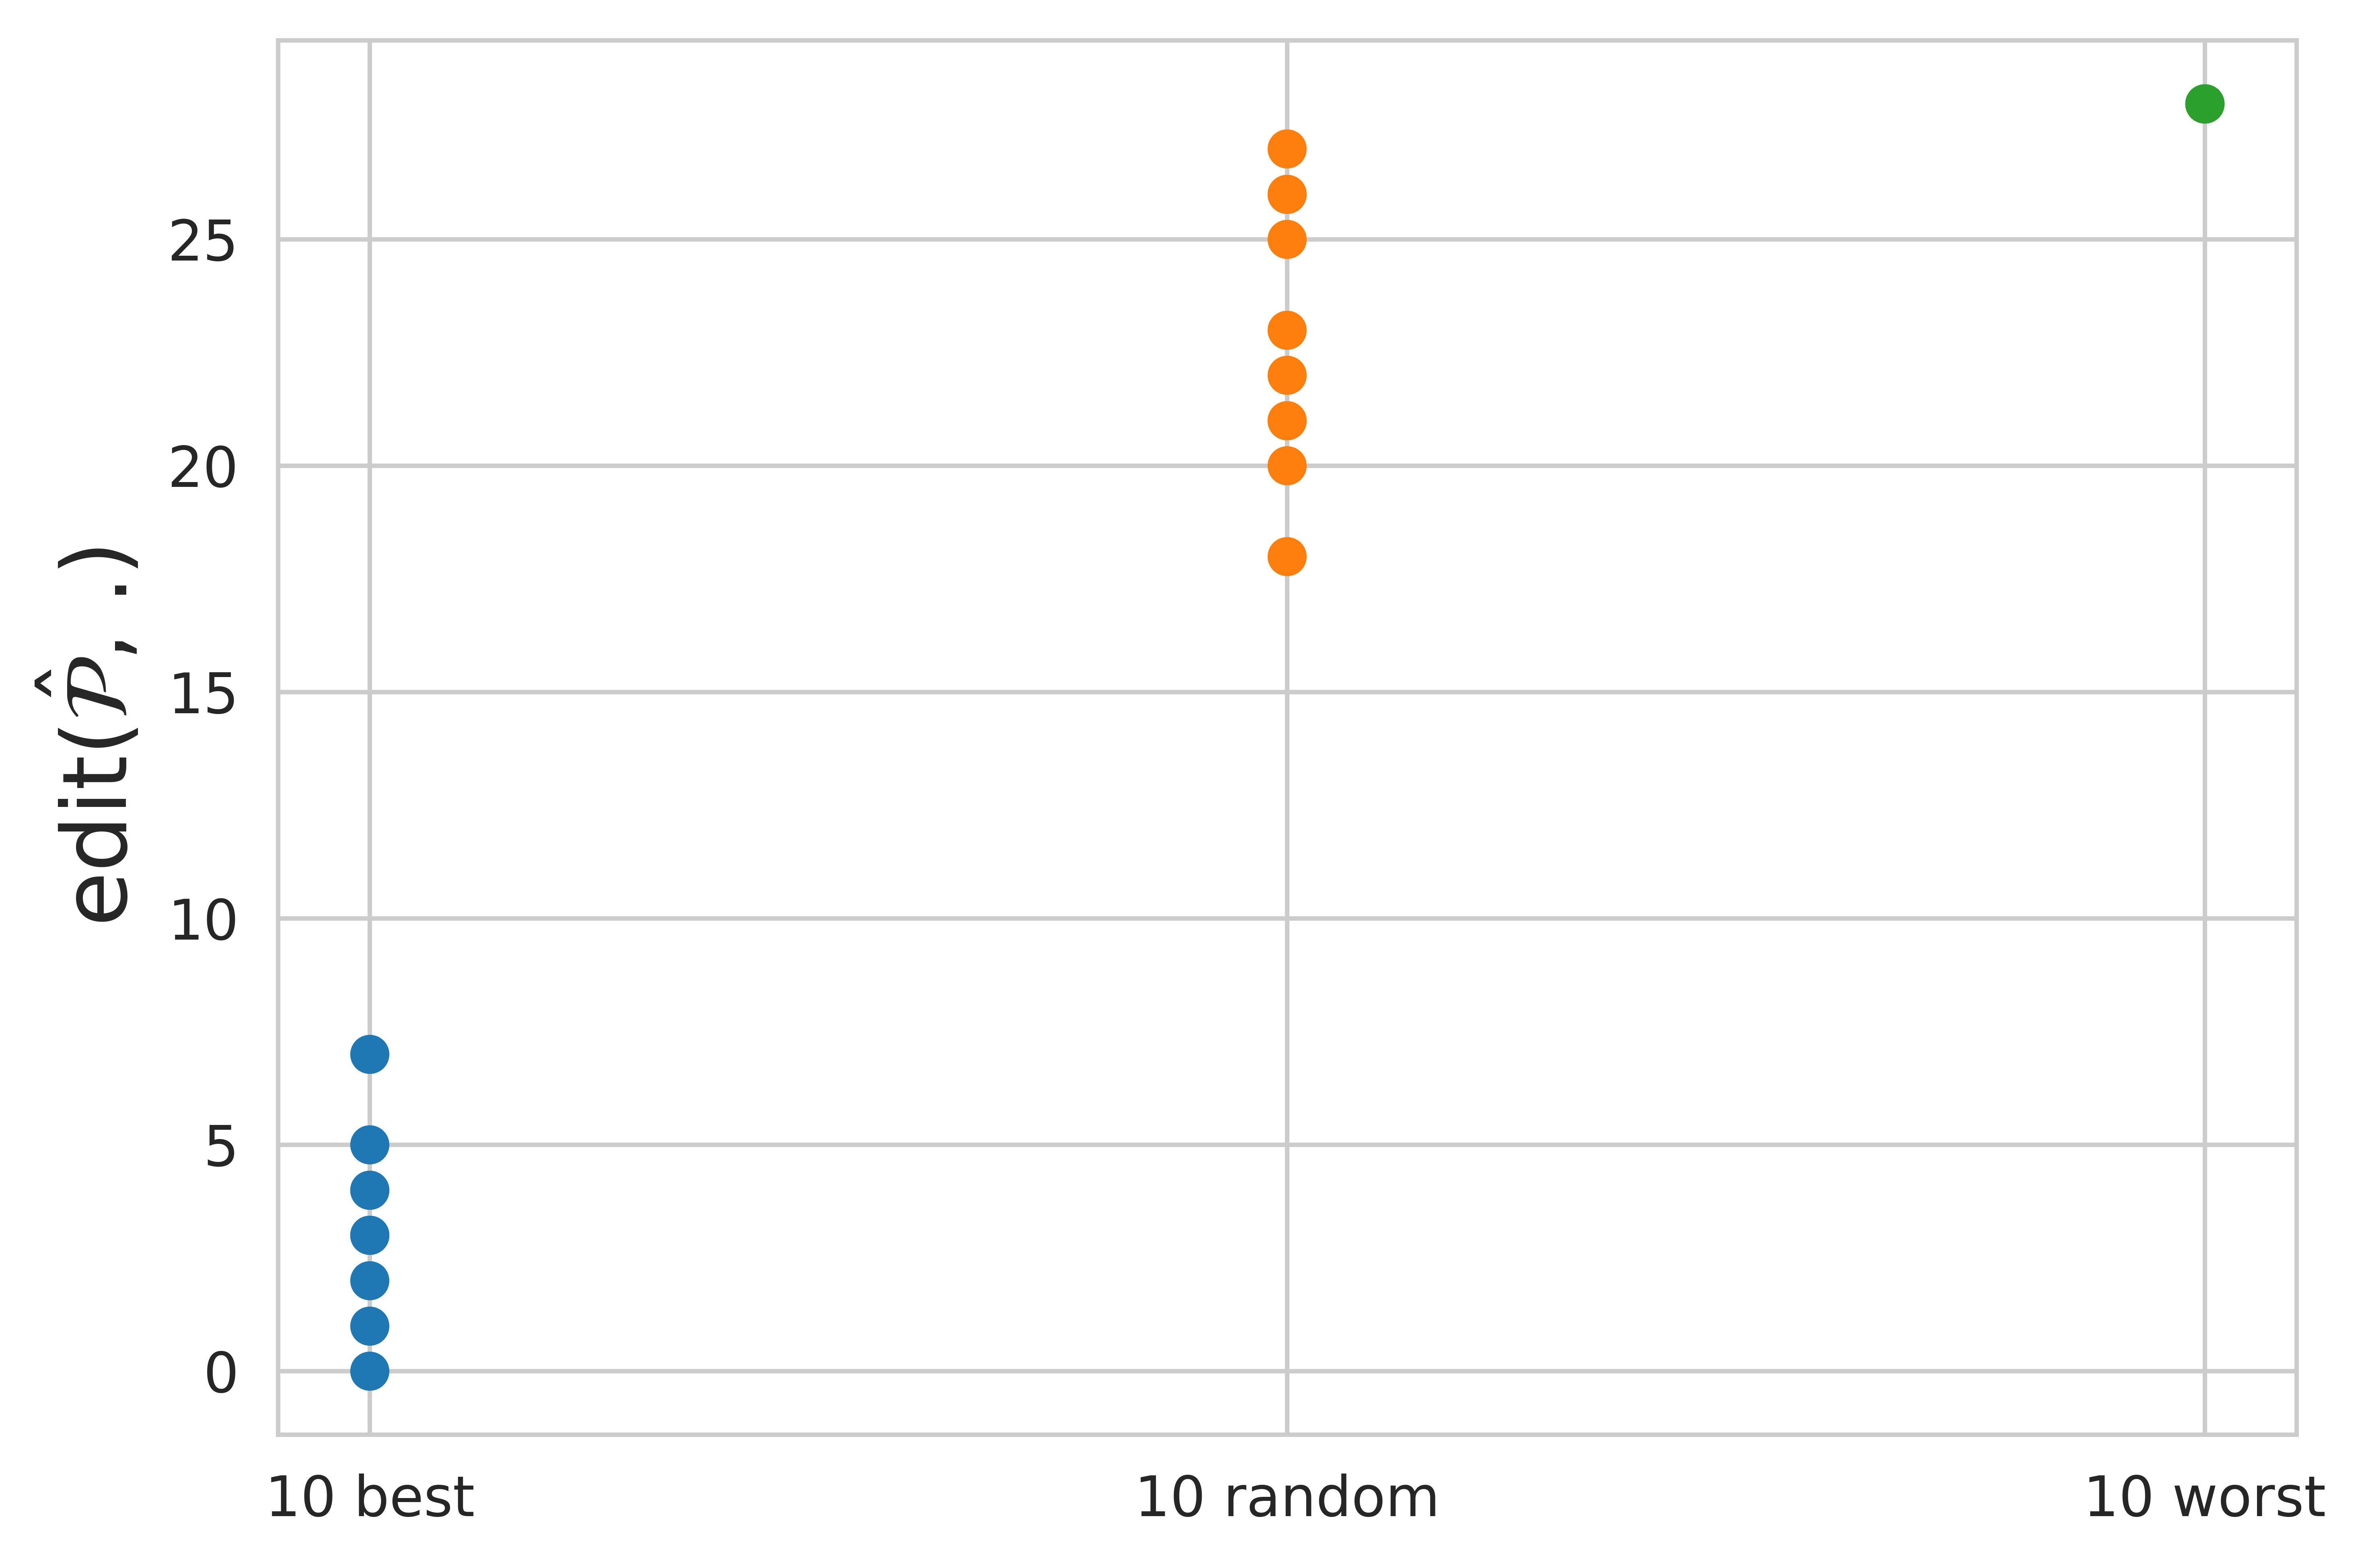

<Figure size 6000x4000 with 0 Axes>

In [6]:
edit_distance_best_rnd_worst(best_partition=best_partition_levine32, by_subsets=by_subsets_levine32,
                             d=32, k=3, exp_name="Levine32")

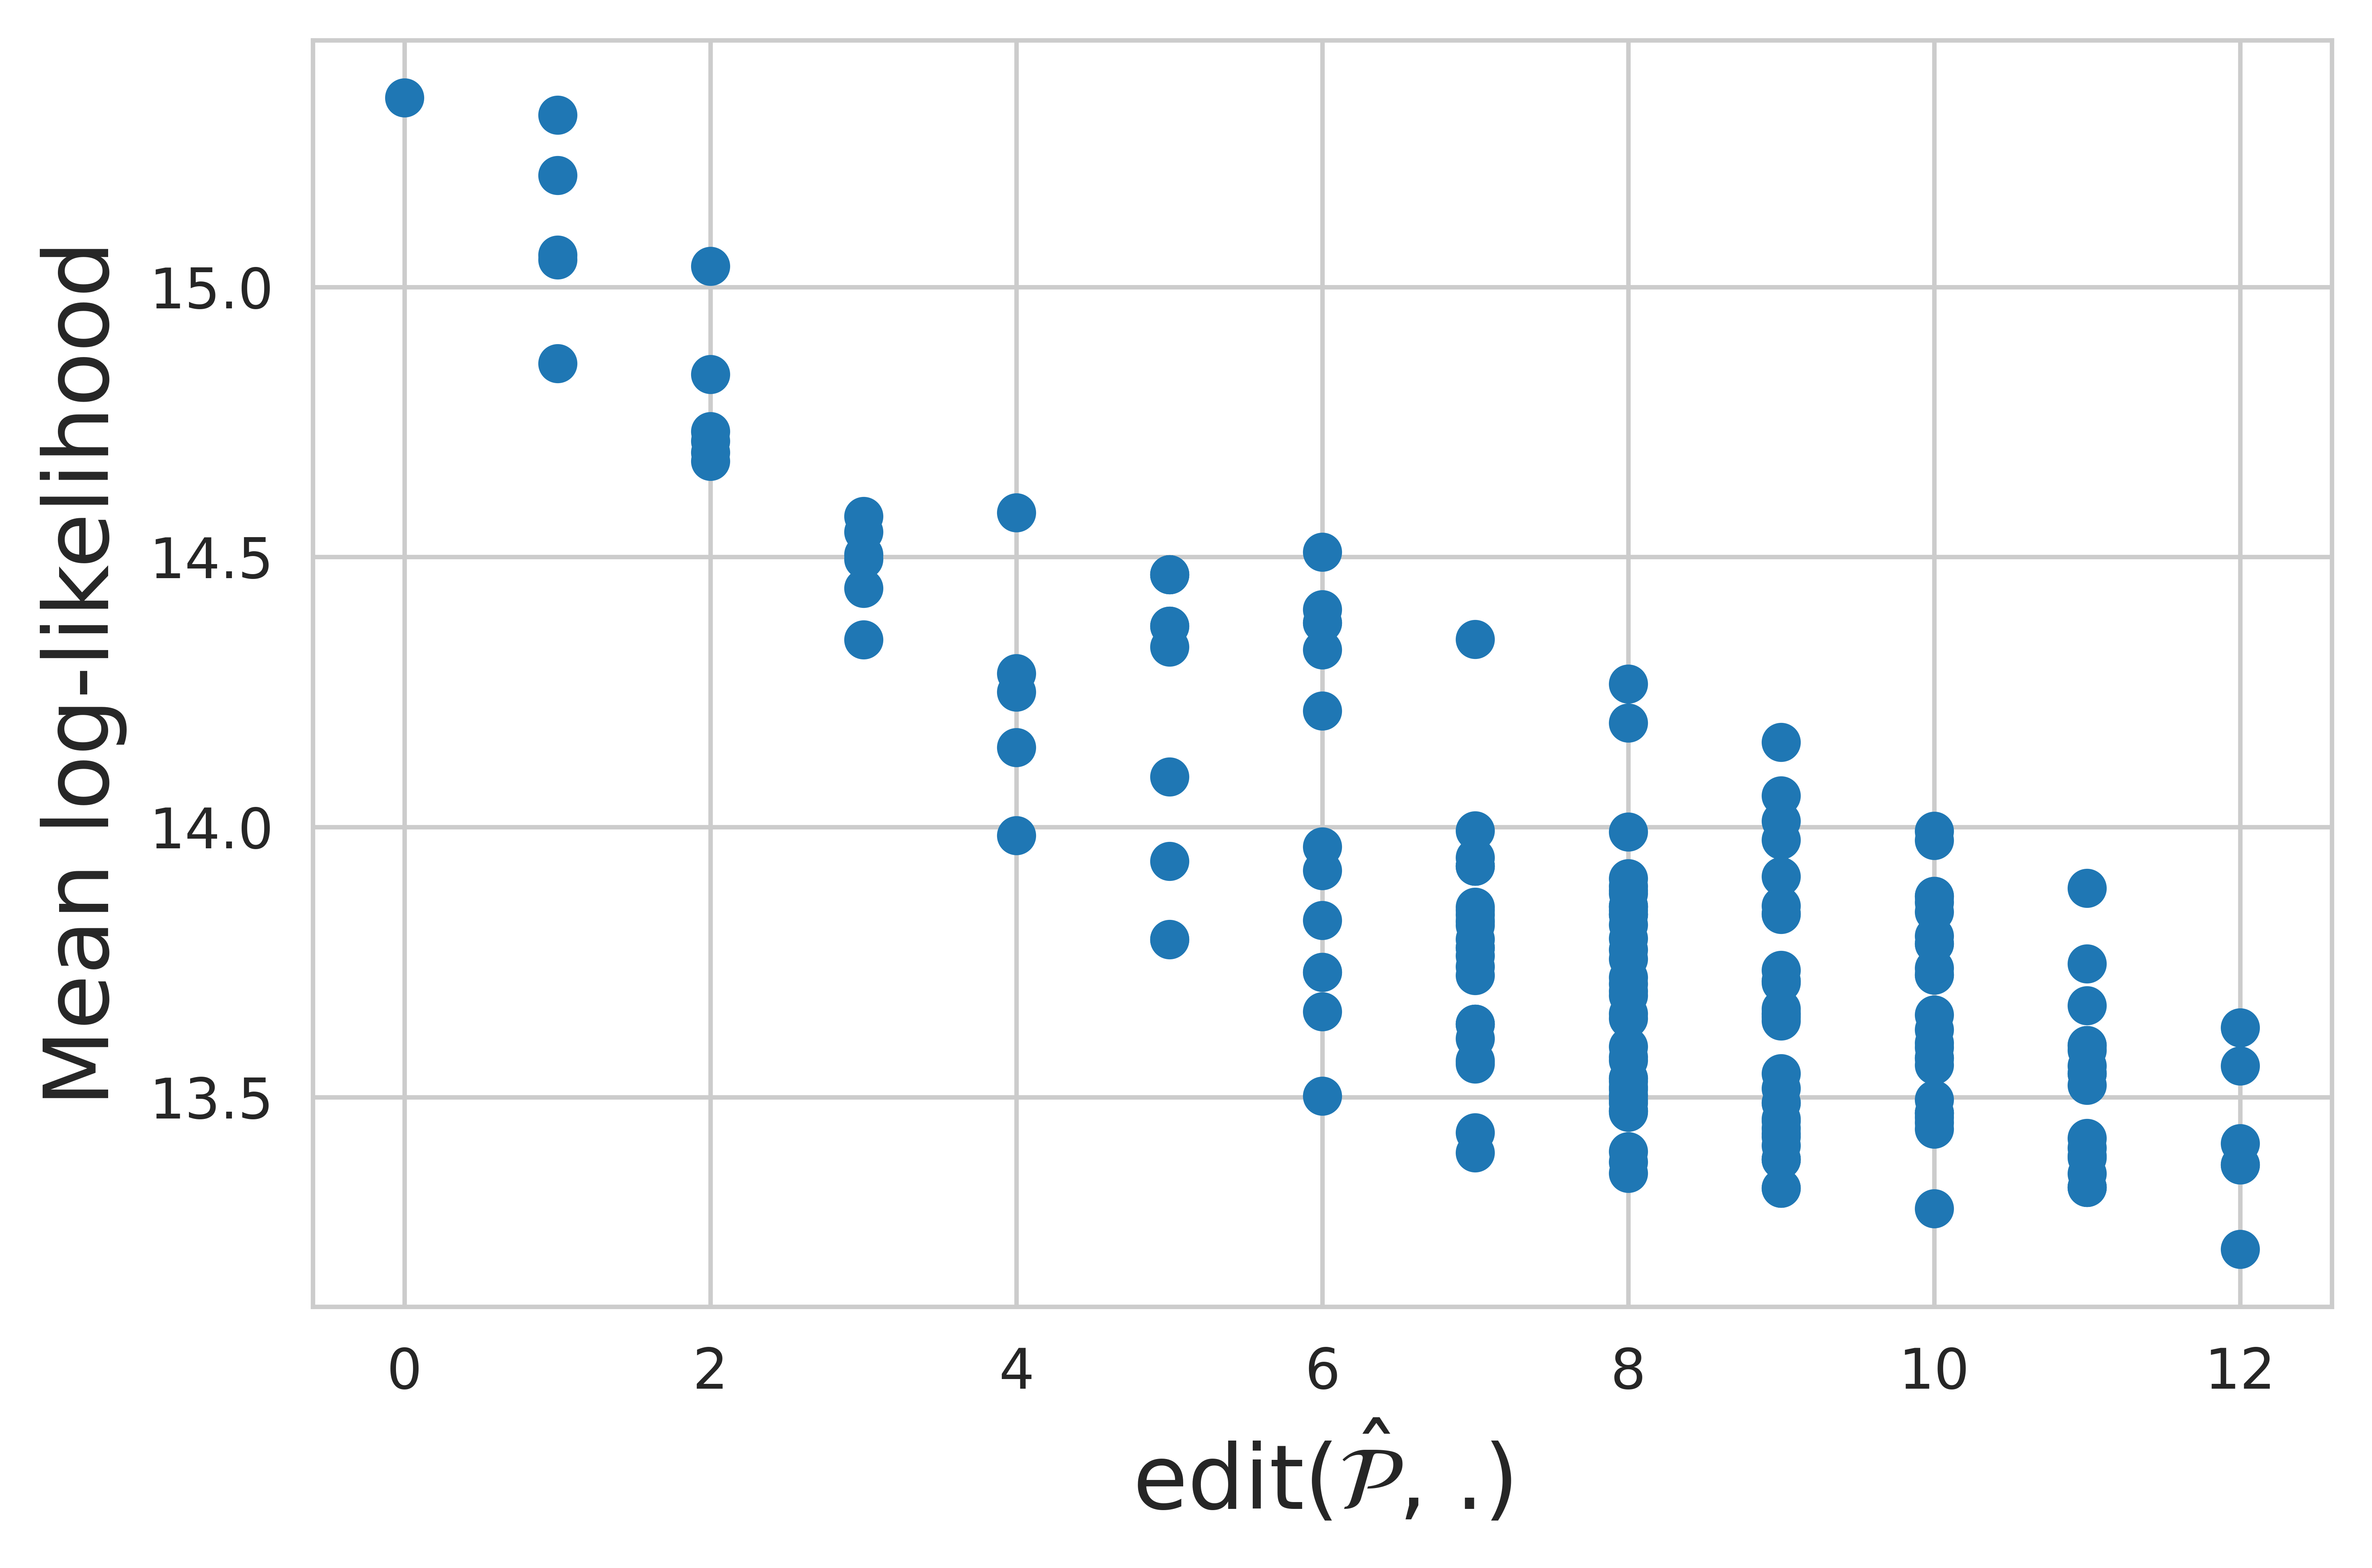

<Figure size 6000x4000 with 0 Axes>

In [7]:
random_walk(X_train=X_train_levine13, X_validation=X_validation_levine13, best_partition=best_partition_levine13,
           by_subsets=by_subsets_levine13, k=5, exp_name="Levine13")

/home/louis/These/repos/ISDE-Paper/includes/isde.py:171: RuntimeWarning: divide by zero encountered in log
  return np.log( gaussian_kde(grid_points=grid_points, eval_points=eval_points, h=self.bandwidth) )


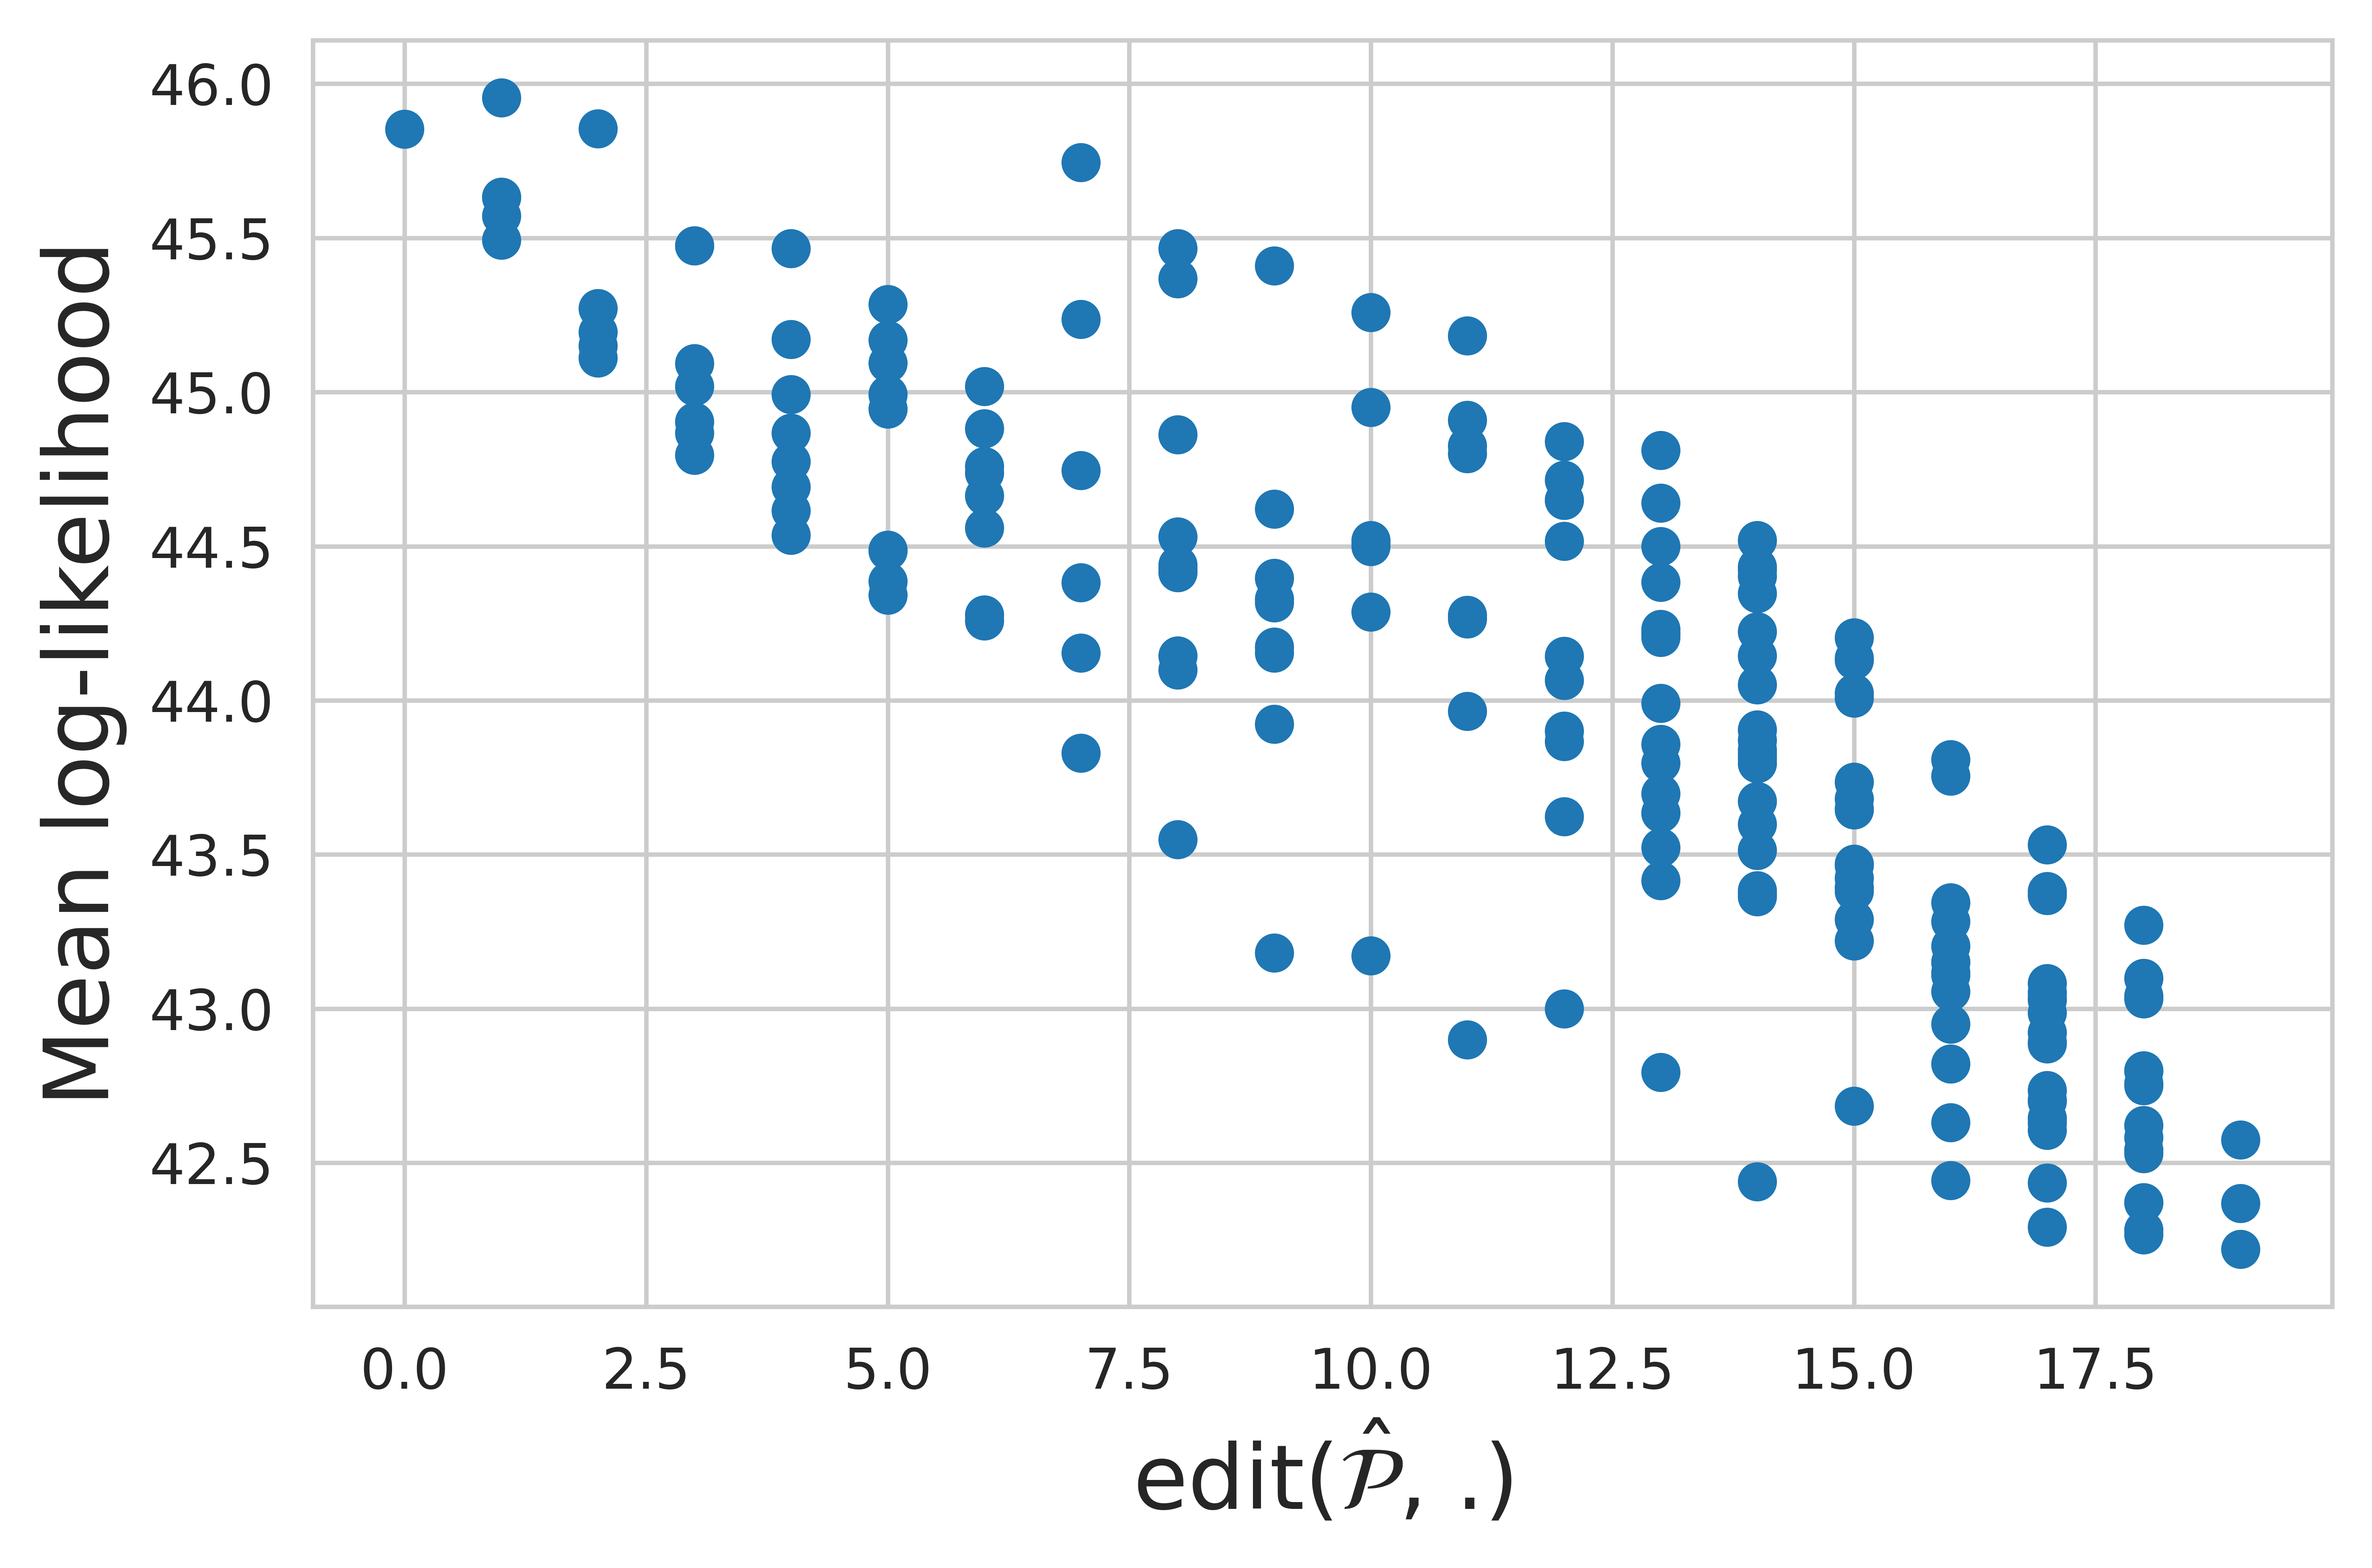

<Figure size 6000x4000 with 0 Axes>

In [8]:
random_walk(X_train=X_train_levine32, X_validation=X_validation_levine32, best_partition=best_partition_levine32,
           by_subsets=by_subsets_levine32, k=3, exp_name="Levine32")

# Exhaustive analysis (only for Levine13)

In [9]:
import more_itertools as mit

indices = [i for i in range(13)]
partitions = []

for l in range(1, len(indices)+1):
    for part in mit.set_partitions(indices, l):
        if np.max([len(i) for i  in part]) <= 5:
            partitions.append(part)
            
scores = []
for p in partitions:
    scores.append(np.sum([by_subsets_levine13[tuple(S)]["log_likelihood"] for S in p]))
    
scores = np.array(scores)

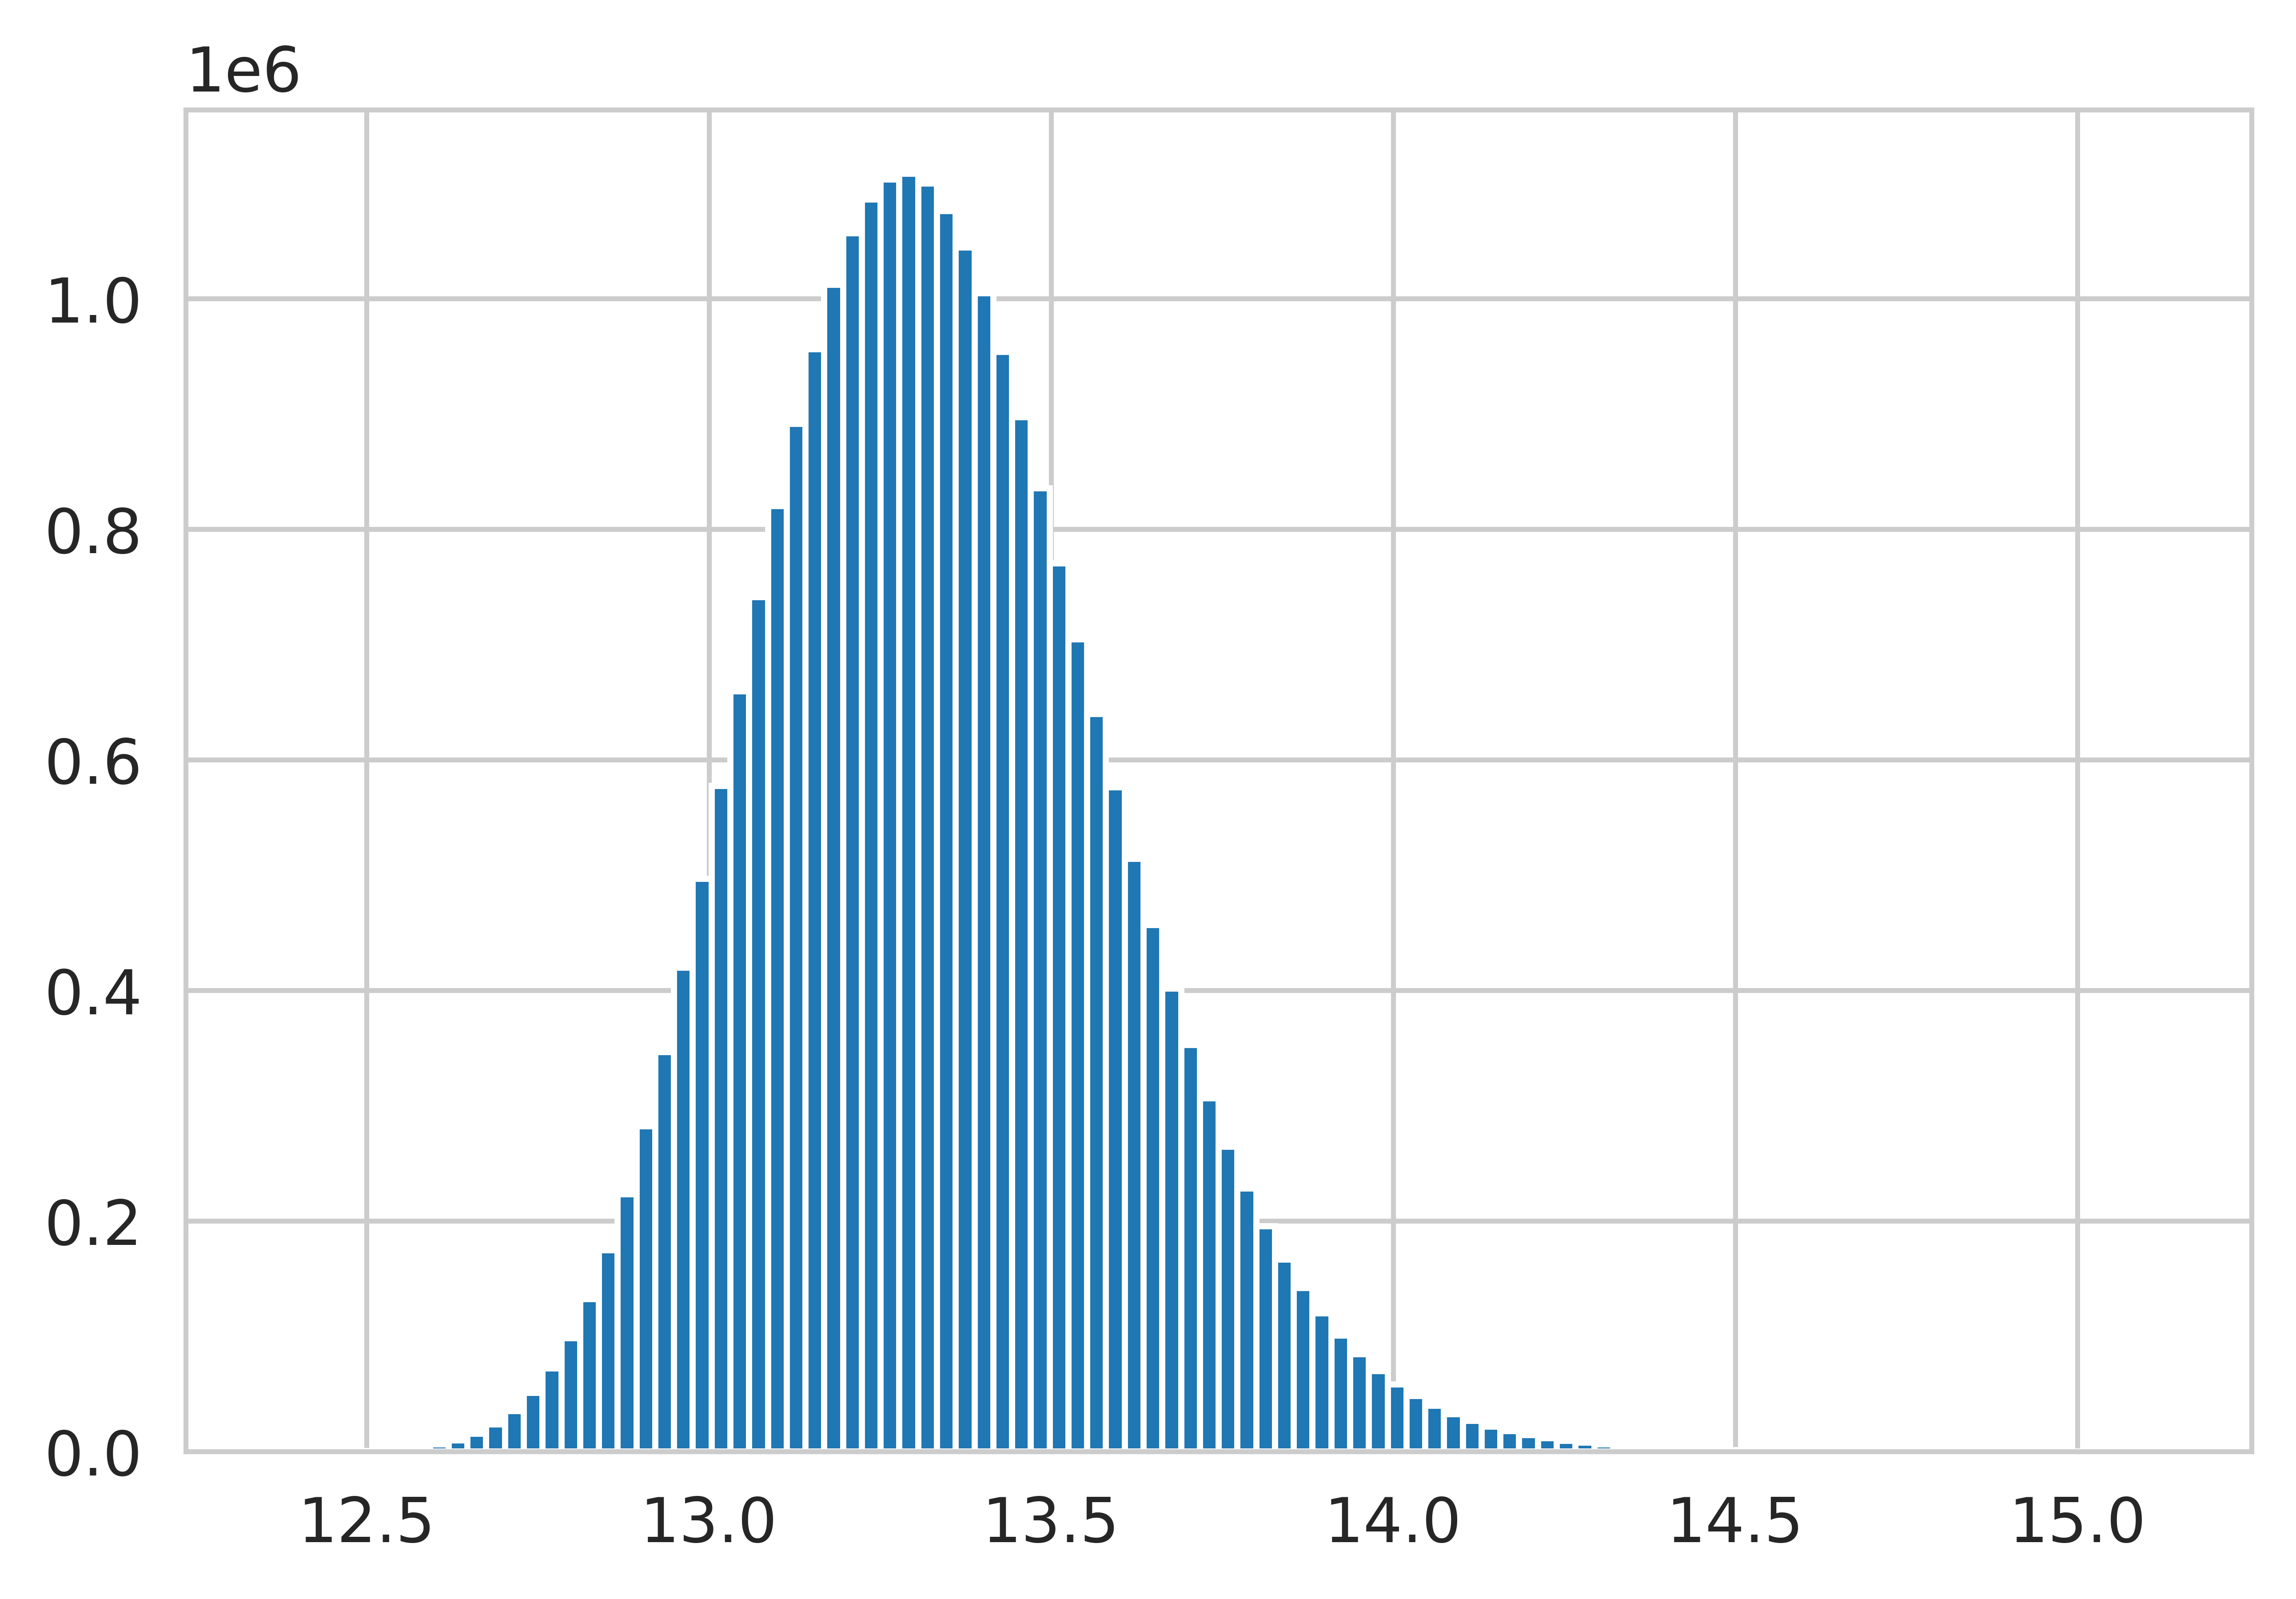

<Figure size 6000x4000 with 0 Axes>

In [10]:
mpl.rcParams['figure.dpi'] = 1000
sns.set_style("whitegrid")
plt.hist(scores, bins=100)
plt.show()

mpl.rcParams['figure.dpi'] = 1000
sns.set_style("whitegrid")
plt.hist(scores, bins=100)
plt.savefig("data/Levine13/scores_histogram.png")
plt.clf()

In [11]:
threshold = 14.6

indices_keep = np.array(np.argwhere(scores > threshold).transpose()[0], dtype=np.int)
len(indices_keep)

1454

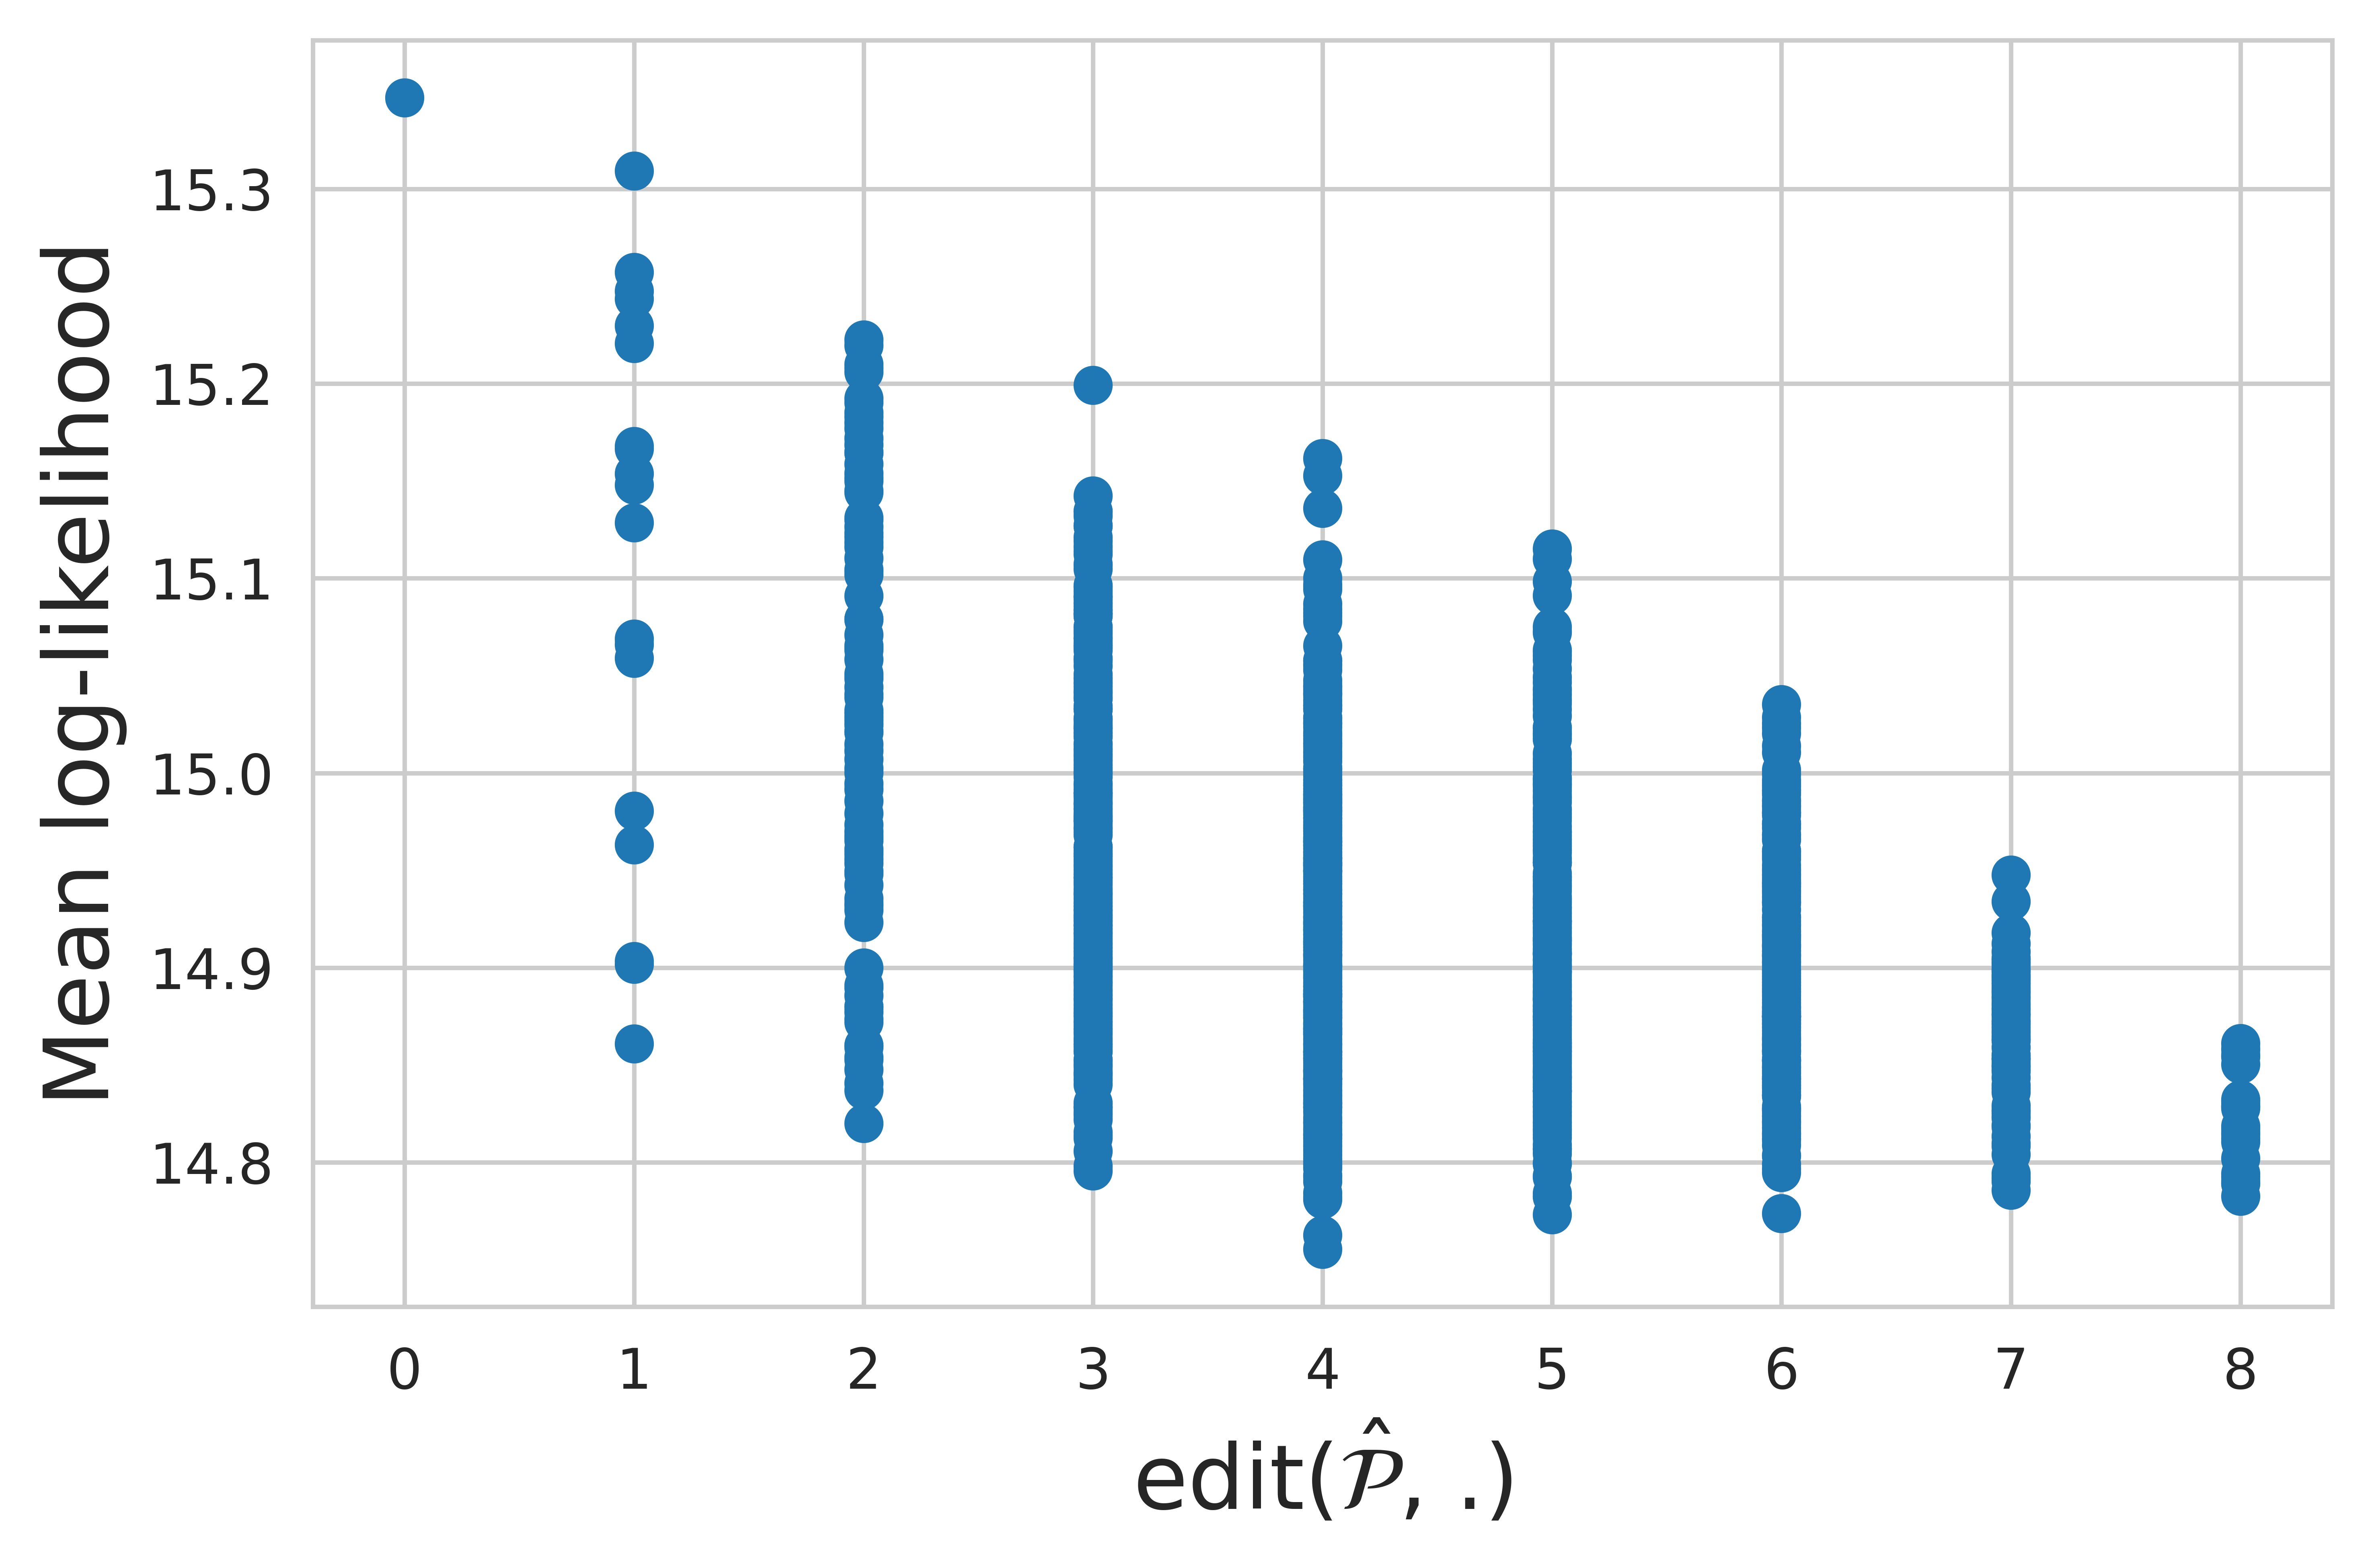

<Figure size 6000x4000 with 0 Axes>

In [12]:
M = 10
N_v = 2000

partitions_keep = [partitions[i] for i in indices_keep]
edit_from_best_keep = [edit(best_partition_levine13, p) for p in partitions_keep]
lls = np.zeros(shape=(M, len(partitions_keep)))

N_valid, d = X_validation_levine13.shape
indices = list(range(N_valid))


for i in range(M):
    np.random.shuffle(indices)
    X_v = X_validation_levine13[indices[0:N_v], :]
    
    for j, p in enumerate(partitions_keep):

        # ISDE
        logdensity_isde = logdensity_from_partition(X_grid=X_train_levine13, X_eval=X_v,
                                                         partition=p, by_subsets=by_subsets_levine13)

        lls[i, j] = logdensity_isde.mean()
        

mpl.rcParams['figure.dpi'] = 1000
sns.set_style("whitegrid")
means = np.ma.masked_invalid(lls).mean(axis=0)
plt.xlabel("edit($\hat{\mathcal{P}}$, .)", size=16)
plt.ylabel("Mean log-likelihood", size=16)
plt.scatter(edit_from_best_keep, means)
plt.tight_layout()
plt.show()

mpl.rcParams['figure.dpi'] = 1000
sns.set_style("whitegrid")
means = np.ma.masked_invalid(lls).mean(axis=0)
plt.xlabel("edit($\hat{\mathcal{P}}$, .)", size=16)
plt.ylabel("Mean log-likelihood", size=16)
plt.scatter(edit_from_best_keep, means)
plt.savefig("data/Levine13/ll_wrt_edit_exhaustif_treshold{}.png".format(threshold))
plt.tight_layout()
plt.clf()